In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression

In [49]:
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

In [50]:
df_train.shape


(614, 13)

In [51]:
df_test.shape

(367, 12)

In [52]:
df_train.head

<bound method NDFrame.head of       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849            

In [53]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Credit_History,50,0.081433
Self_Employed,32,0.052117
LoanAmount,22,0.035831
Dependents,15,0.024430
Loan_Amount_Term,14,0.022801
Gender,13,0.021173
Married,3,0.004886
Loan_Status,0,0.000000
Property_Area,0,0.000000
CoapplicantIncome,0,0.000000


In [54]:
df_train['Gender'] = df_train['Gender'].fillna(
df_train['Gender'].dropna().mode().values[0] )
df_train['Married'] = df_train['Married'].fillna(
df_train['Married'].dropna().mode().values[0] )
df_train['Dependents'] = df_train['Dependents'].fillna(
df_train['Dependents'].dropna().mode().values[0] )
df_train['Self_Employed'] = df_train['Self_Employed'].fillna(
df_train['Self_Employed'].dropna().mode().values[0] )
df_train['LoanAmount'] = df_train['LoanAmount'].fillna(
df_train['LoanAmount'].dropna().median() )
df_train['Loan_Amount_Term'] = df_train['Loan_Amount_Term'].fillna(
df_train['Loan_Amount_Term'].dropna().mode().values[0] )
df_train['Credit_History'] = df_train['Credit_History'].fillna(
df_train['Credit_History'].dropna().mode().values[0] )

In [55]:
total=df_train.isnull().sum().sort_values(ascending=False)
percent=(df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data=pd.concat([total,percent],axis=1,keys=['Total','Percent'])
missing_data.head(20)

,Total,Percent
Loan_Status,0,0.0
Property_Area,0,0.0
Credit_History,0,0.0
Loan_Amount_Term,0,0.0
LoanAmount,0,0.0
CoapplicantIncome,0,0.0
ApplicantIncome,0,0.0
Self_Employed,0,0.0
Education,0,0.0
Dependents,0,0.0


In [56]:
df_train.Dependents.value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Gender'>

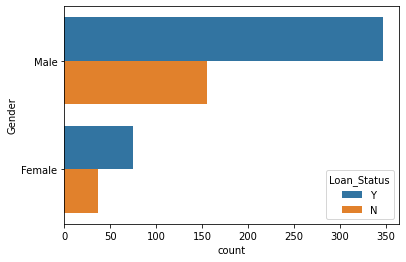

In [57]:
sns.countplot(y='Gender',hue='Loan_Status',data=df_train)

<AxesSubplot:xlabel='count', ylabel='Married'>

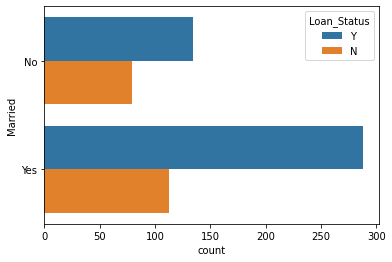

In [58]:
sns.countplot(y='Married',hue='Loan_Status',data=df_train)

<AxesSubplot:xlabel='count', ylabel='Self_Employed'>

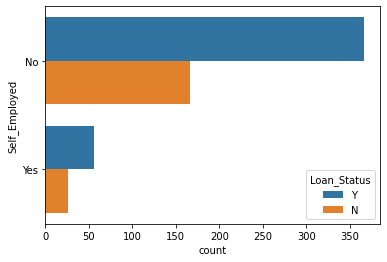

In [59]:
sns.countplot(y='Self_Employed',hue='Loan_Status',data=df_train)

<AxesSubplot:xlabel='count', ylabel='Credit_History'>

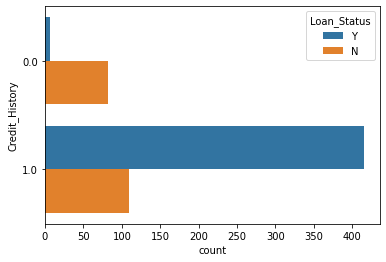

In [60]:
sns.countplot(y='Credit_History',hue='Loan_Status',data=df_train)

<AxesSubplot:xlabel='count', ylabel='Property_Area'>

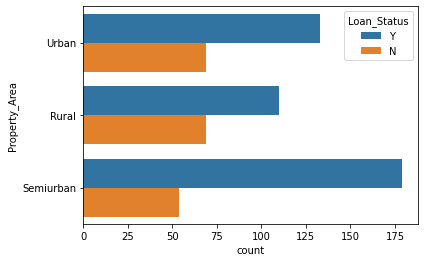

In [61]:
sns.countplot(y='Property_Area',hue='Loan_Status',data=df_train)

<AxesSubplot:xlabel='count', ylabel='Loan_Amount_Term'>

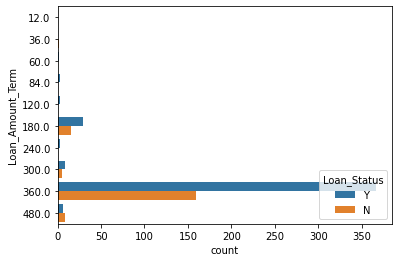

In [62]:
sns.countplot(y='Loan_Amount_Term',hue='Loan_Status',data=df_train)

C:\Users\Riya\AppData\Roaming\Python\Python37\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


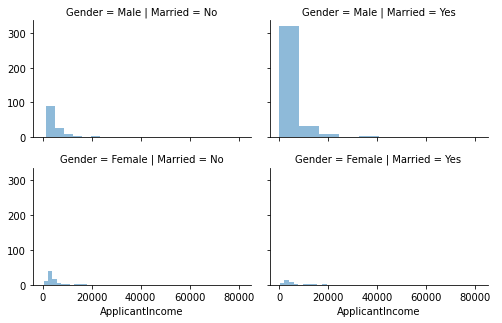

In [63]:
grid=sns.FacetGrid(df_train, row='Gender',col='Married',size=2.3,aspect=1.5)
grid.map(plt.hist,'ApplicantIncome',alpha=0.5,bins=10)
grid.add_legend()

C:\Users\Riya\AppData\Roaming\Python\Python37\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


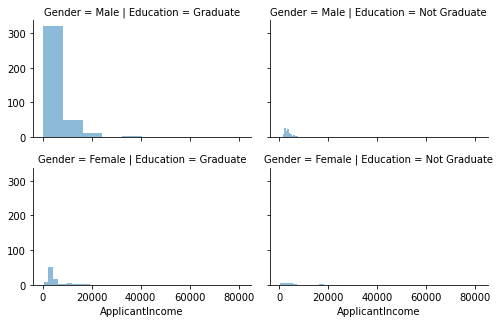

In [64]:
grid=sns.FacetGrid(df_train, row='Gender',col='Education',size=2.3,aspect=1.5)
grid.map(plt.hist,'ApplicantIncome',alpha=0.5,bins=10)
grid.add_legend()

C:\Users\Riya\AppData\Roaming\Python\Python37\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


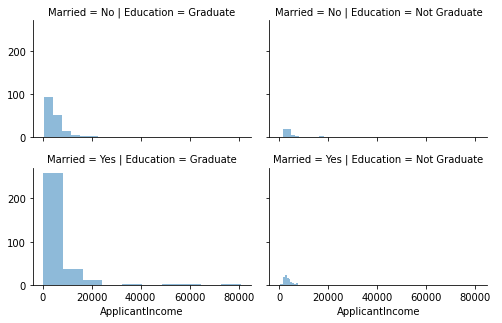

In [65]:
grid=sns.FacetGrid(df_train, row='Married',col='Education',size=2.3,aspect=1.5)
grid.map(plt.hist,'ApplicantIncome',alpha=0.5,bins=10)
grid.add_legend()

C:\Users\Riya\AppData\Roaming\Python\Python37\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


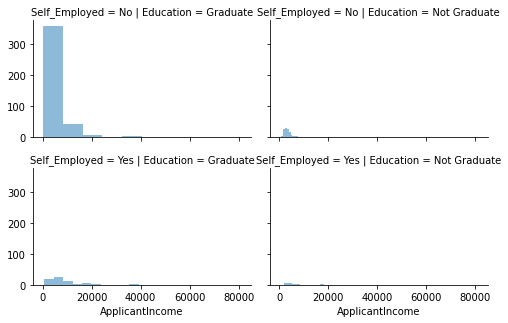

In [66]:
grid=sns.FacetGrid(df_train, row='Self_Employed',col='Education',size=2.3,aspect=1.5)
grid.map(plt.hist,'ApplicantIncome',alpha=0.5,bins=10)
grid.add_legend()

C:\Users\Riya\AppData\Roaming\Python\Python37\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


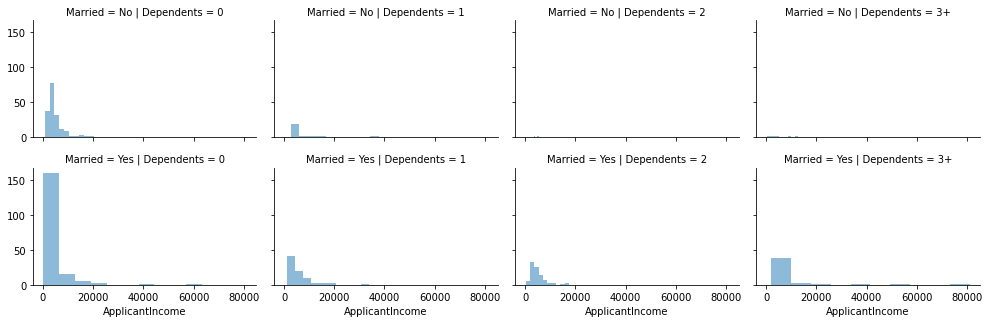

In [67]:
grid=sns.FacetGrid(df_train, row='Married',col='Dependents',size=2.3,aspect=1.5)
grid.map(plt.hist,'ApplicantIncome',alpha=0.5,bins=10)
grid.add_legend()

C:\Users\Riya\AppData\Roaming\Python\Python37\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


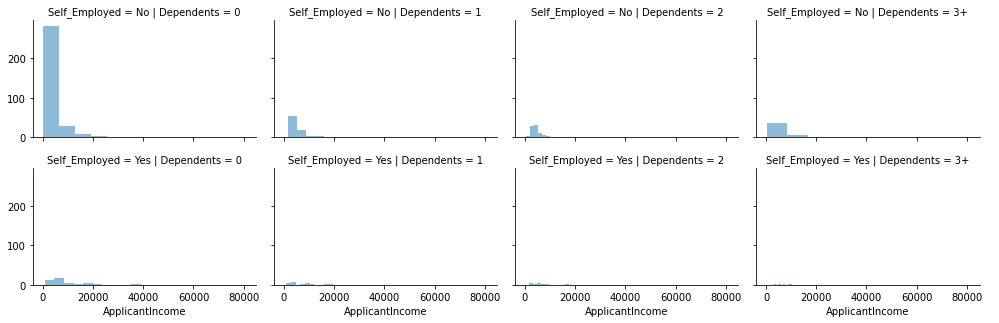

In [68]:
grid=sns.FacetGrid(df_train, row='Self_Employed',col='Dependents',size=2.3,aspect=1.5)
grid.map(plt.hist,'ApplicantIncome',alpha=0.5,bins=10)
grid.add_legend()

C:\Users\Riya\AppData\Roaming\Python\Python37\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


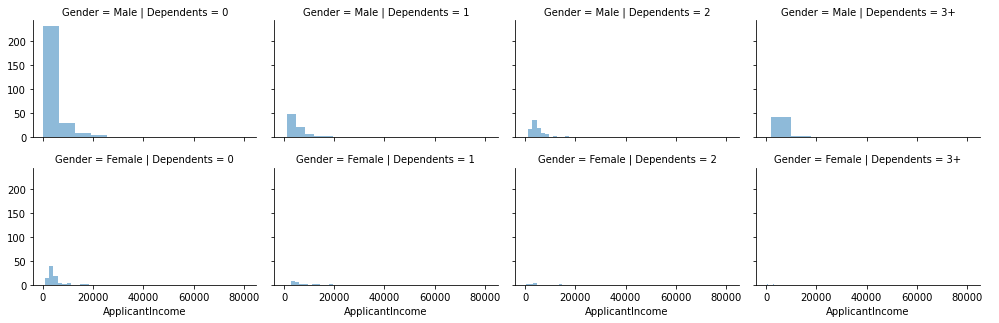

In [69]:
grid=sns.FacetGrid(df_train, row='Gender',col='Dependents',size=2.3,aspect=1.5)
grid.map(plt.hist,'ApplicantIncome',alpha=0.5,bins=10)
grid.add_legend()

C:\Users\Riya\AppData\Roaming\Python\Python37\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


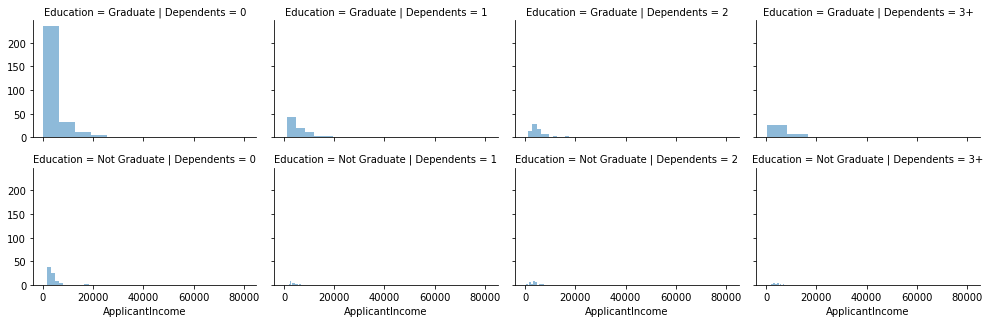

In [70]:
grid=sns.FacetGrid(df_train, row='Education',col='Dependents',size=2.3,aspect=1.5)
grid.map(plt.hist,'ApplicantIncome',alpha=0.5,bins=10)
grid.add_legend()

C:\Users\Riya\AppData\Roaming\Python\Python37\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


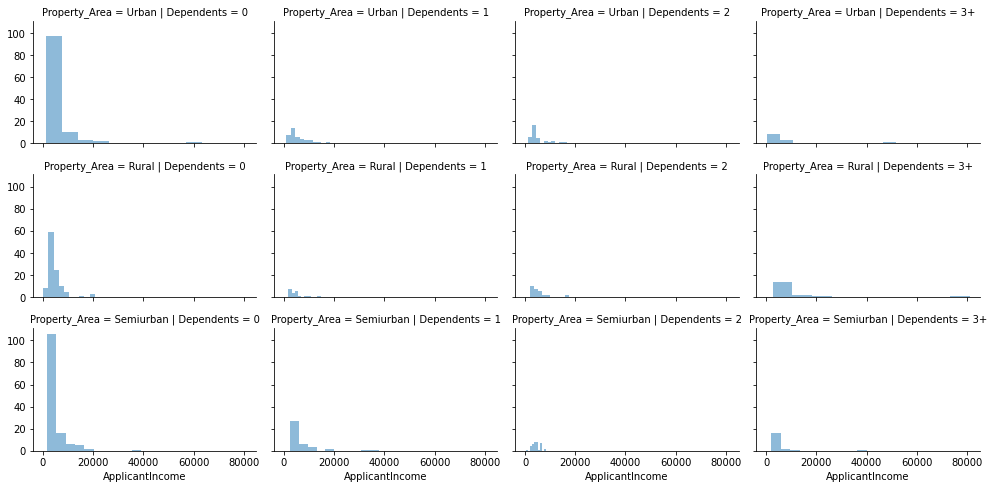

In [71]:
grid=sns.FacetGrid(df_train, row='Property_Area',col='Dependents',size=2.3,aspect=1.5)
grid.map(plt.hist,'ApplicantIncome',alpha=0.5,bins=10)
grid.add_legend()

C:\Users\Riya\AppData\Roaming\Python\Python37\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


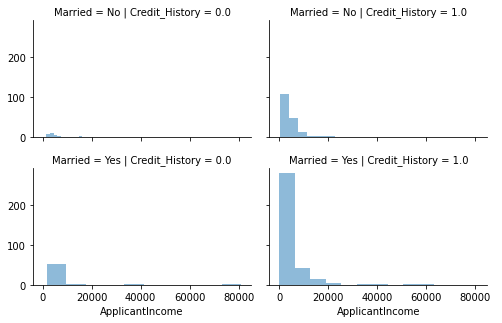

In [72]:
grid=sns.FacetGrid(df_train, row='Married',col='Credit_History',size=2.3,aspect=1.5)
grid.map(plt.hist,'ApplicantIncome',alpha=0.5,bins=10)
grid.add_legend()

C:\Users\Riya\AppData\Roaming\Python\Python37\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


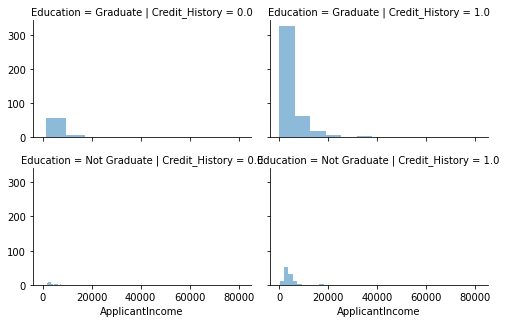

In [73]:
grid=sns.FacetGrid(df_train, row='Education',col='Credit_History',size=2.3,aspect=1.5)
grid.map(plt.hist,'ApplicantIncome',alpha=0.5,bins=10)
grid.add_legend()

In [74]:
code_numeric = {'Male': 1, 'Female': 2,
'Yes': 1, 'No': 2,
'Graduate': 1, 'Not Graduate': 2,
'Urban': 3, 'Semiurban': 2,'Rural': 1,
'Y': 1, 'N': 0,
'3+': 3}
df_train = df_train.applymap(lambda s: code_numeric.get(s) if s in code_numeric else s)
df_test = df_test.applymap(lambda s: code_numeric.get(s) if s in code_numeric else s)
#drop the uniques loan id
df_train.drop('Loan_ID', axis = 1, inplace = True)

In [75]:
df_train['Dependents'].value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [76]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 55.2+ KB


In [77]:
Dependents_ = pd.to_numeric(df_train.Dependents)
Dependents__ = pd.to_numeric(df_test.Dependents)
df_train.drop(['Dependents'], axis = 1, inplace = True)
df_test.drop(['Dependents'], axis = 1, inplace = True)
df_train = pd.concat([df_train, Dependents_], axis = 1)
df_test = pd.concat([df_test, Dependents__], axis = 1)


In [78]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Education          614 non-null    int64  
 3   Self_Employed      614 non-null    int64  
 4   ApplicantIncome    614 non-null    int64  
 5   CoapplicantIncome  614 non-null    float64
 6   LoanAmount         614 non-null    float64
 7   Loan_Amount_Term   614 non-null    float64
 8   Credit_History     614 non-null    float64
 9   Property_Area      614 non-null    int64  
 10  Loan_Status        614 non-null    int64  
 11  Dependents         614 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 57.6 KB


<AxesSubplot:>

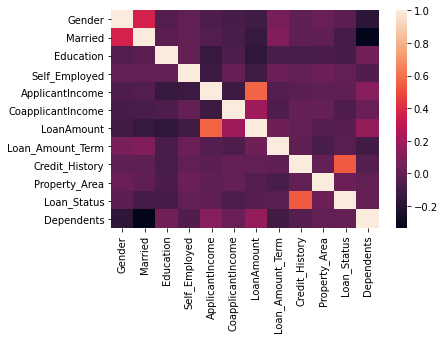

In [79]:
sns.heatmap(df_train.corr())

In [80]:
y = df_train['Loan_Status']
X = df_train.drop('Loan_Status', axis = 1)
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [81]:
#logistic regression

In [84]:
model = LogisticRegression(solver='lbfgs', max_iter=2000)


In [85]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [87]:
ypred = model.predict(X_test)
print(ypred)

[1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 1 1 1 1 1 0 1]


In [88]:
evaluation = f1_score(y_test, ypred)
evaluation

0.8979591836734695

In [89]:
#Decision tree

In [90]:
tree=DecisionTreeClassifier()

In [92]:
tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [94]:
ypred_tree=tree.predict(X_test)
print(ypred_tree)

[0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1 1 0 1
 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 0 1 0 0 1 1 1 0 1 1 1 1 0
 1 1 0 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 0 0 0 1 1 1 1 0 1 0 1 1 1 1 0 1 0 0
 1 1 1 0 0 1 1 1 0 1 0 0]


In [96]:
evaluation_tree = f1_score(y_test, ypred_tree)
evaluation_tree

0.7810650887573963

In [97]:
#Random forest classifier

In [98]:
forest=RandomForestClassifier()

In [99]:
forest.fit(X_train,y_train)

RandomForestClassifier()

In [101]:
ypred_forest=forest.predict(X_test)
print(ypred_forest)

[1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 1 1 1 1 1 0 1]


In [102]:
evaluation_forest=f1_score(y_test, ypred_forest)
evaluation_forest

0.8586387434554974

In [ ]:
#conclusion: according to the paper we find that logistic regression has given us the highest accuracy.